<a href="https://colab.research.google.com/github/Deadcoder001/-music-recommendation-system/blob/main/AMLT_1%2C2%2C3%2C6%2C7%2C15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
data = pd.read_csv(url)
print("Initial Dataset:\n", data.head())

Initial Dataset:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
# Step 1: Handle Missing Values
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())
imputer = SimpleImputer(strategy='mean')
data_imputed =pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])),
columns=data.select_dtypes(include=[np.number]).columns)
data[data_imputed.columns] = data_imputed
# Verify missing values are handled
print("\nDataset After Handling Missing Values:\n", data.head())


Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Dataset After Handling Missing Values:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
# Step 2: Normalize Numerical Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))
# Convert normalized data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled,
columns=data.select_dtypes(include=[np.number]).columns)
# Add non-numerical columns back to the DataFrame (e.g., species)
data_scaled[data.select_dtypes(exclude=[np.number]).columns]=data.select_dtypes(exclude=[np.number])
print("\nDataset After Normalization:\n", data_scaled.head())


Dataset After Normalization:
    sepal_length  sepal_width  petal_length  petal_width species
0     -0.900681     1.019004     -1.340227    -1.315444  setosa
1     -1.143017    -0.131979     -1.340227    -1.315444  setosa
2     -1.385353     0.328414     -1.397064    -1.315444  setosa
3     -1.506521     0.098217     -1.283389    -1.315444  setosa
4     -1.021849     1.249201     -1.340227    -1.315444  setosa


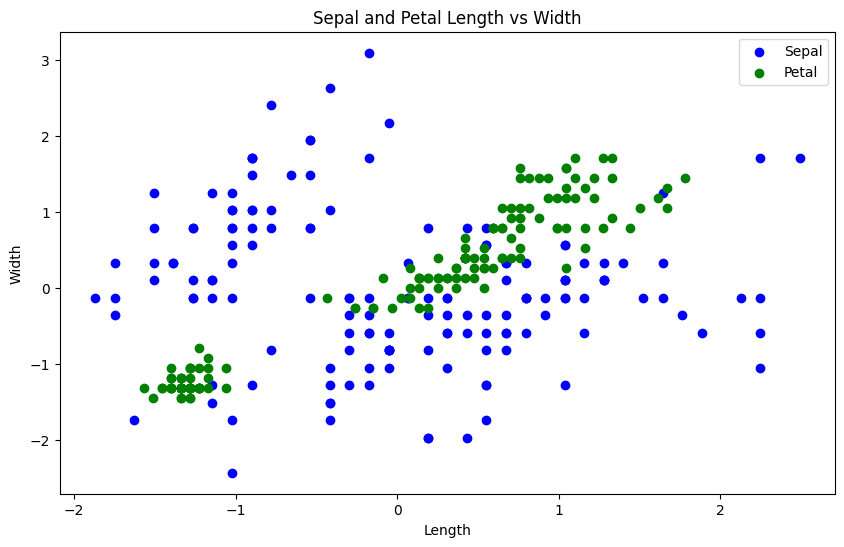

In [ ]:
# Step 3: Visualize the Data
# For simplicity, let's visualize two features with a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled['sepal_length'], data_scaled['sepal_width'], c='blue', label='Sepal')
plt.scatter(data_scaled['petal_length'], data_scaled['petal_width'], c='green', label='Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Sepal and Petal Length vs Width')
plt.legend()
plt.show()

In [ ]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset and display the initial dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
data = pd.read_csv(url)
print("Initial Dataset:\n", data.head())

Initial Dataset:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


**Aim-2: Write a Python script to preprocess a dataset by handling missing values, encoding categorical variables, and performing feature scaling.**



In [ ]:
# Define the target column if it exists
target_column = 'survived'
if target_column in data.columns:
  y = data[target_column]
  X = data.drop(columns=[target_column])
else:
  y = None
  X = data
# Check for missing values
print("\nMissing Values:\n", X.isnull().sum())


Missing Values:
 pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Step 1: Define columns for imputation
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
# Define the data preprocessing
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=
[('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder(drop='first'))]
)
preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)])

In [ ]:
# Step 2: Split the data into training and testing sets if a target column exists
if y is not None:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
  X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Fit and transform the training data, and transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
# Display the transformed data
print("\nTransformed Training Data (First 5 Rows):\n", X_train[:5])
print("\nTransformed Test Data (First 5 Rows):\n", X_test[:5])
# convert transformed arrays back to DataFrames
column_names = (list(numeric_features) + list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)))
X_train_df = pd.DataFrame(X_train, columns=column_names)
print("\nTransformed Training Data (DataFrame):\n", X_train_df.head())


Transformed Training Data (First 5 Rows):
 [[-1.61413602  1.2322632  -0.47072241 -0.47934164 -0.07868358  1.
   0.          1.          0.          0.          1.          0.
   0.          1.          0.          0.          0.          0.
   0.          1.          0.        ]
 [-0.40055118 -0.50048197 -0.47072241 -0.47934164 -0.37714494  1.
   0.          1.          1.          0.          1.          0.
   0.          1.          0.          0.          0.          0.
   0.          1.          0.        ]
 [ 0.81303367  0.1926161  -0.47072241 -0.47934164 -0.47486697  1.
   0.          1.          0.          1.          1.          0.
   0.          1.          0.          0.          0.          0.
   0.          1.          0.        ]
 [ 0.81303367 -0.26944928  0.37992316 -0.47934164 -0.47623026  1.
   0.          1.          0.          1.          1.          0.
   0.          1.          0.          0.          0.          0.
   0.          1.          0.        ]
 [ 0.813

Aim-3: Implement a linear regression model on a dataset. Split the
data into training and testing sets. Plot the training and testing
errors to demonstrate overfitting and underfitting.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing

In [ ]:
# Load the California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [ ]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# We will fit models of varying complexity (polynomial degree from 1 to 5)
degrees = [1, 2, 3, 4, 5]
# Step 2: Initialize variables for storing errors
train_errors = []
test_errors = []


In [ ]:
# Initialize lists to store errors
train_errors = []
test_errors = []

# Assuming X_train, X_test, y_train, y_test are already defined
for degree in degrees:
    # Apply polynomial feature transformation
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Calculate training and testing errors
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)


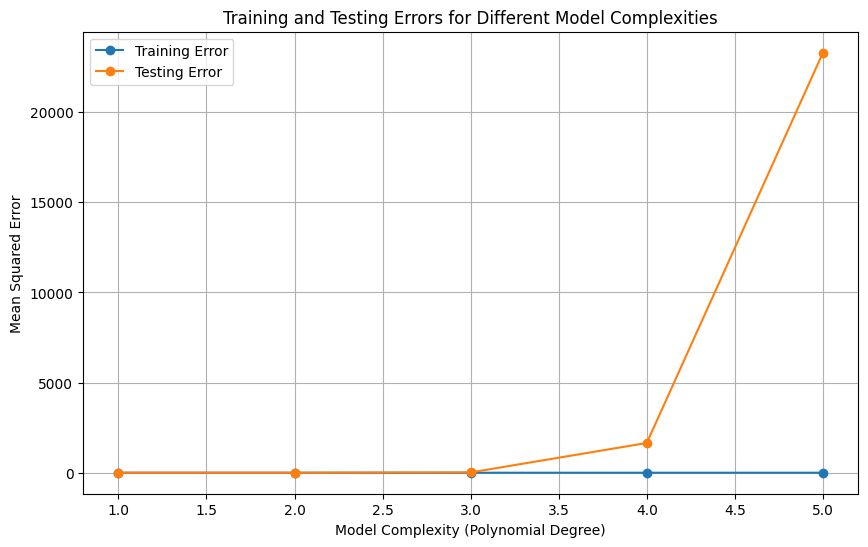

In [ ]:
# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='o')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors for Different Model Complexities')
plt.legend()
plt.grid(True)
plt.show()

**Aim-6: Train an SVM classifier on a dataset with different kernels
(linear, polynomial, RBF). Perform hyperparameter tuning and
visualize the decision boundaries.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


Kernel: linear
Best parameters: {'C': 10, 'gamma': 'scale'}
Training accuracy: 0.8095
Testing accuracy: 0.8000


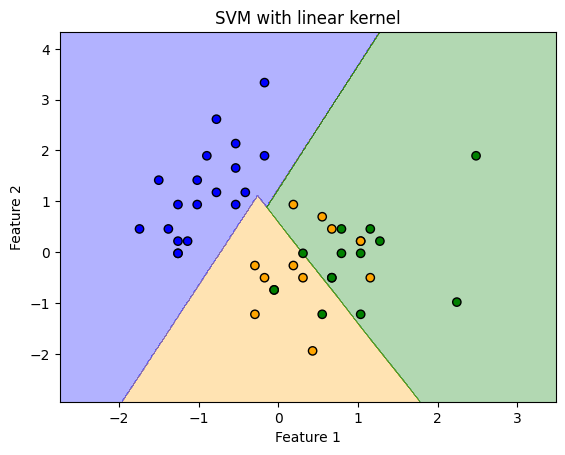


Kernel: poly
Best parameters: {'C': 0.1, 'gamma': 10}
Training accuracy: 0.7143
Testing accuracy: 0.7556


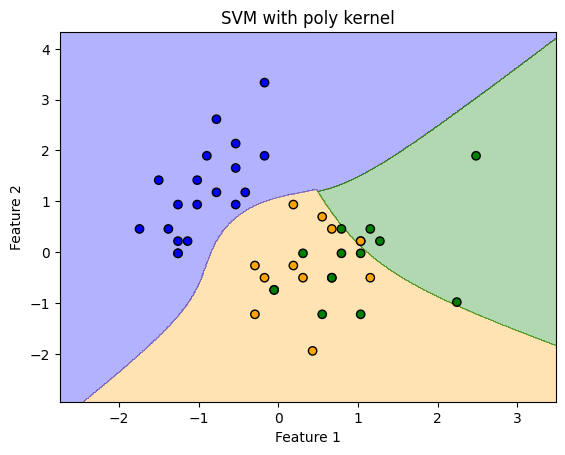


Kernel: rbf
Best parameters: {'C': 0.1, 'gamma': 'scale'}
Training accuracy: 0.8000
Testing accuracy: 0.7778


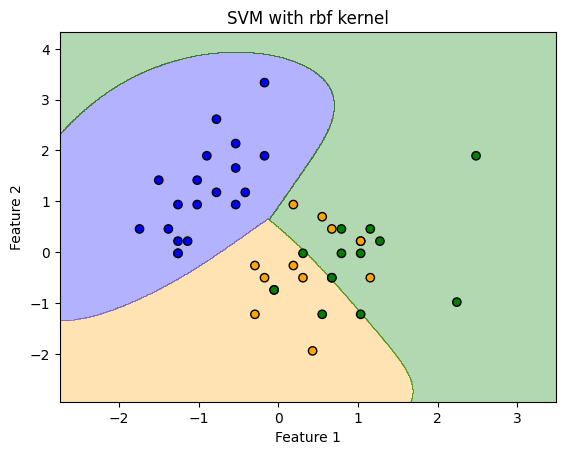

In [ ]:
# Load the Iris dataset and use only two features for 2D visualization
iris = load_iris()
X = iris.data[:, :2] # Only the first two features
y = iris.target
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Define kernels to experiment with
kernels = ['linear', 'poly', 'rbf']
parameters = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1, 10]}
# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    X1, X2 = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))
    plt.contourf(X1, X2, clf.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape),
                 alpha=0.3, cmap=ListedColormap(('blue', 'orange', 'green')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('blue', 'orange', 'green')))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
for kernel in kernels:
  print(f"\nKernel: {kernel}")
  svc = SVC(kernel=kernel)
  clf = GridSearchCV(svc, param_grid=parameters, cv=5, scoring='accuracy')
  clf.fit(X_train, y_train)
  # Display the best parameters and model performance
  print(f"Best parameters: {clf.best_params_}")
  print(f"Training accuracy: {clf.best_score_:.4f}")
  print(f"Testing accuracy: {clf.score(X_test, y_test):.4f}")
  # Plot decision boundary for each kernel
  plot_decision_boundary(clf.best_estimator_, X_test, y_test, f"SVM with {kernel} kernel")

**Aim-7: Build a decision tree and a random forest classifier on a
dataset. Evaluate and compare their performance. Visualize the
decision tree and feature importances.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Step 1: Build a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
# Step 2: Build a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
# Step 3: Make predictions and evaluate the models
dt_y_pred = dt_classifier.predict(X_test)
rf_y_pred = rf_classifier.predict(X_test)
# Step 4: Display accuracy and classification report
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))


Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



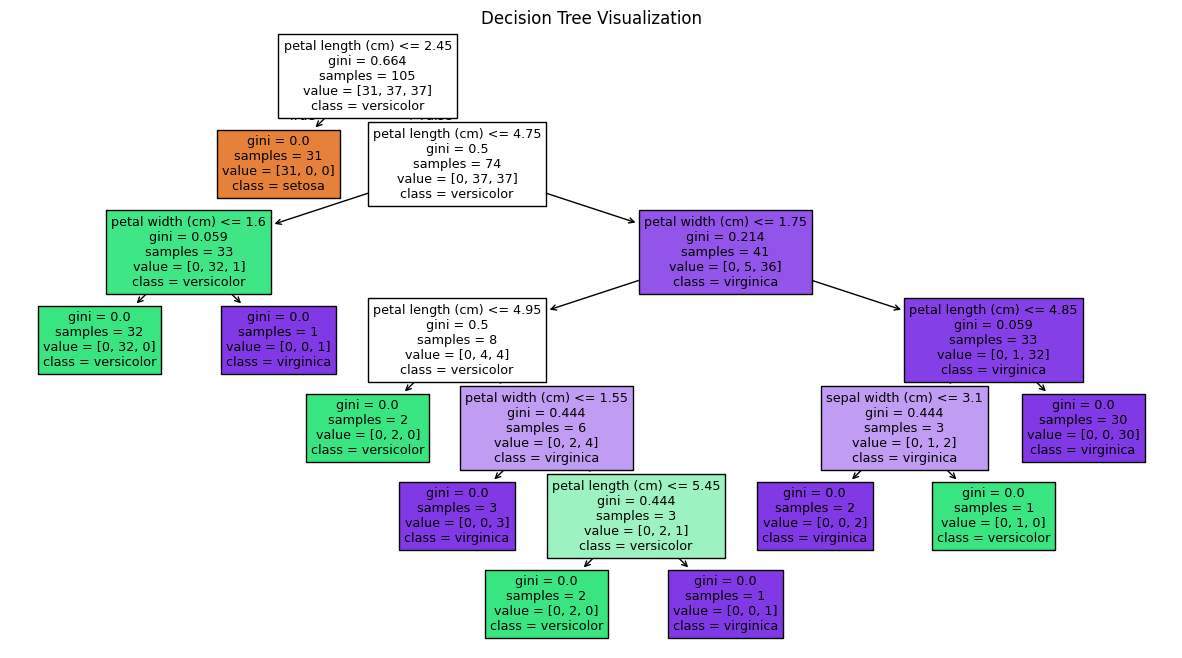

In [ ]:
# Step 5: Visualize the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt_classifier, feature_names=iris.feature_names,
class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

**Aim-15: Implement a CNN for image classification using a dataset
like CIFAR-10 or MNIST. Visualize the learned filters and analyse the
model's performance.**

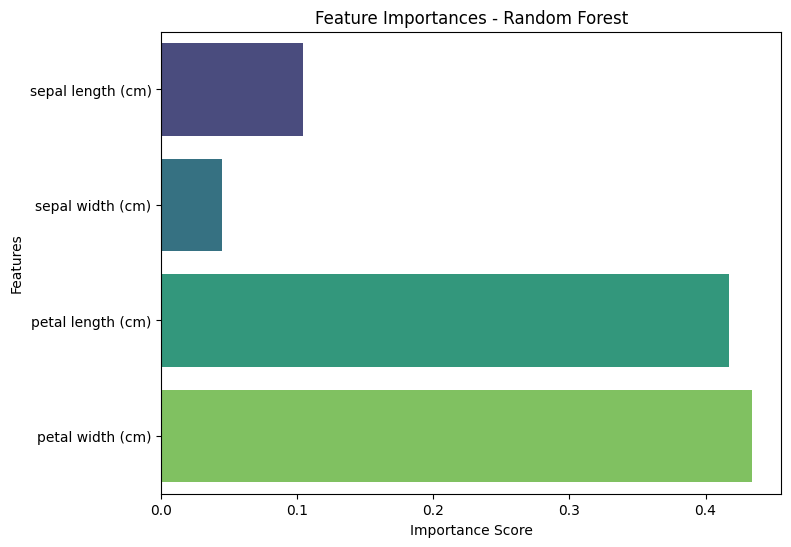

In [ ]:
# Step 6: Feature Importance for Random Forest
feature_importances = rf_classifier.feature_importances_
features = iris.feature_names
# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features, hue=features, palette="viridis", legend=False)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


**Aim-15: Implement a CNN for image classification using a dataset
like CIFAR-10 or MNIST. Visualize the learned filters and analyse the
model's performance.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Normalize pixel values to between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 113ms/step - accuracy: 0.7006 - loss: 0.8598 - val_accuracy: 0.6915 - val_loss: 0.8832
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 84ms/step - accuracy: 0.7090 - loss: 0.8242 - val_accuracy: 0.6998 - val_loss: 0.8602
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.7150 - loss: 0.8129 - val_accuracy: 0.7025 - val_loss: 0.8755
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.7245 - loss: 0.7840 - val_accuracy: 0.7245 - val_loss: 0.8131
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.7323 - loss: 0.7587 - val_accuracy: 0.7247 - val_loss: 0.8194
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.7354 - loss: 0.7476 - val_accuracy: 0.7217 - val_loss: 0.8227
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.7426 - loss: 0.7329 - val_accuracy: 0.7157 - val_loss: 0.8408
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7527 - loss: 0.7020 

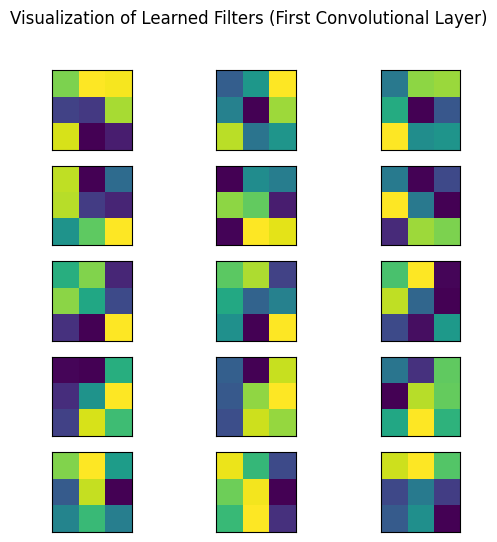

In [ ]:
# Retrieve filters and biases from the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values to 0-1 for better visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Number of filters to visualize (e.g., 5 filters)
n_filters = 5
ix = 1

# Plot the filters
plt.figure(figsize=(6, 6))
for i in range(n_filters):
    # Get the i-th filter
    f = filters[:, :, :, i]

    # Plot each channel of the filter (RGB channels)
    for j in range(3):  # Iterate over the 3 channels (RGB)
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])  # Hide the x ticks
        ax.set_yticks([])  # Hide the y ticks
        plt.imshow(f[:, :, j], cmap='viridis')  # Use viridis colormap for better visualization
        ix += 1

plt.suptitle("Visualization of Learned Filters (First Convolutional Layer)")
plt.show()